In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Loading the dataset

In [5]:
dt = pd.read_csv("Loan Prediction Dataset.csv")
dt.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
dt.shape # 614 rows, 13 columns

(614, 13)

In [7]:
dt.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [8]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


## Preprocessing the dataset

In [9]:
dt.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
# fill the missing values for numerical terms
dt['LoanAmount'] = dt['LoanAmount'].fillna(dt['LoanAmount'].mean())
dt['Loan_Amount_Term'] = dt['Loan_Amount_Term'].fillna(dt['Loan_Amount_Term'].mean())
dt['Credit_History'] = dt['Credit_History'].fillna(dt['Credit_History'].mean())

In [11]:
# fill the missing values for categorical terms
dt['Gender'] = dt["Gender"].fillna(dt['Gender'].mode()[0])
dt['Married'] = dt["Married"].fillna(dt['Married'].mode()[0])
dt['Dependents'] = dt["Dependents"].fillna(dt['Dependents'].mode()[0])
dt['Self_Employed'] = dt["Self_Employed"].fillna(dt['Self_Employed'].mode()[0])

In [12]:
dt.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## Exploratory Data Analysis

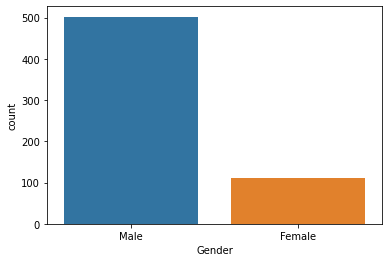

In [13]:
# categorical attributes visualization
sns.countplot(dt['Gender'])

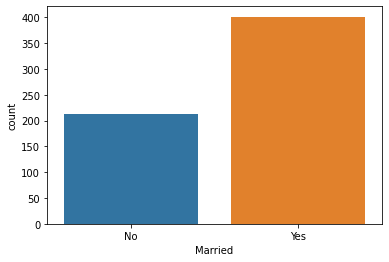

In [14]:
sns.countplot(dt['Married'])

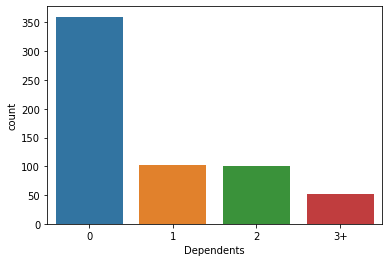

In [15]:
sns.countplot(dt['Dependents'])

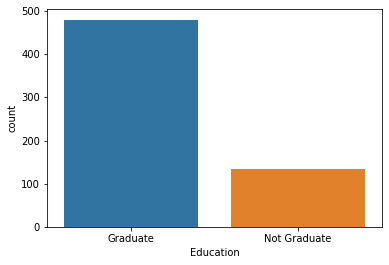

In [16]:
sns.countplot(dt['Education'])

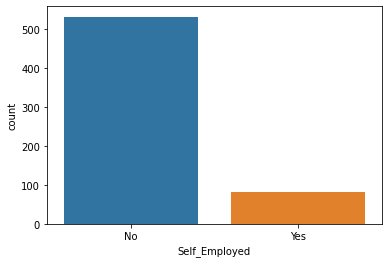

In [17]:
sns.countplot(dt['Self_Employed'])

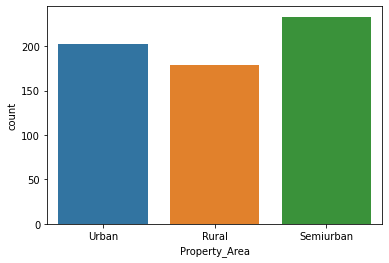

In [18]:
sns.countplot(dt['Property_Area'])

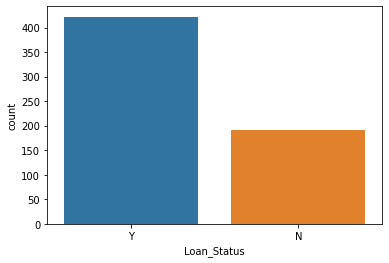

In [19]:
sns.countplot(dt['Loan_Status'])

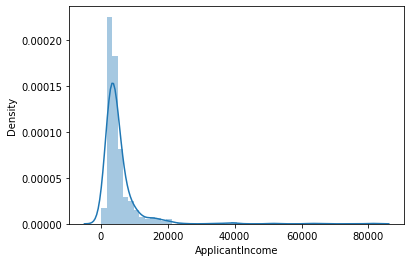

In [20]:
# numerical attributes visualization
sns.distplot(dt["ApplicantIncome"])

# skewed to the left, requires transformation techniques such as standard scalar, min max scalar, or log transformation

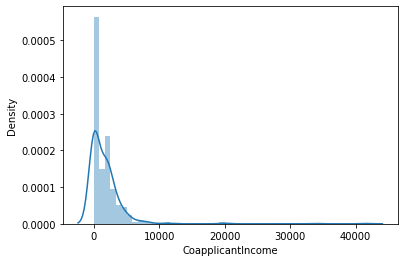

In [21]:
sns.distplot(dt["CoapplicantIncome"])

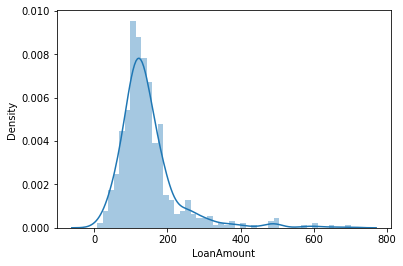

In [22]:
sns.distplot(dt["LoanAmount"])

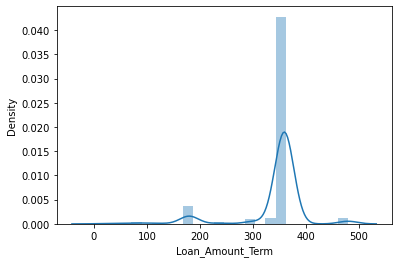

In [23]:
sns.distplot(dt['Loan_Amount_Term'])

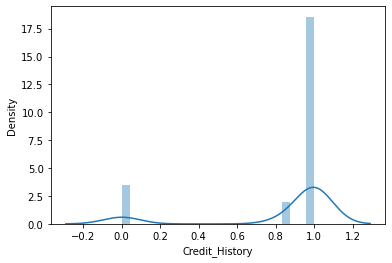

In [24]:
sns.distplot(dt['Credit_History'])

## Creation of new attributes

In [25]:
# total income
dt['Total_Income'] = dt['ApplicantIncome'] + dt['CoapplicantIncome']
dt.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0


## Log Transformation

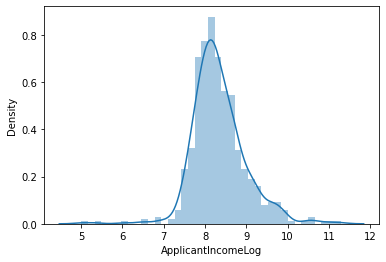

In [26]:
# apply log transformation to the attribute
dt['ApplicantIncomeLog'] = np.log(dt['ApplicantIncome'])
sns.distplot(dt["ApplicantIncomeLog"])

# values are now more dispersed

In [ ]:
# missing numerical values
dt['CoapplicantIncomeLog'] = np.log(dt['CoapplicantIncome'])
sns.distplot(dt["CoapplicantIncomeLog"])

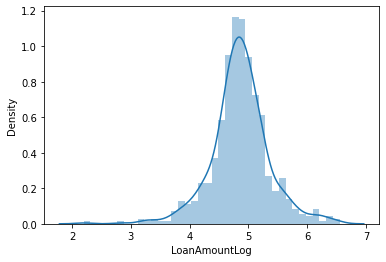

In [28]:
dt['LoanAmountLog'] = np.log(dt['LoanAmount'])
sns.distplot(dt["LoanAmountLog"])

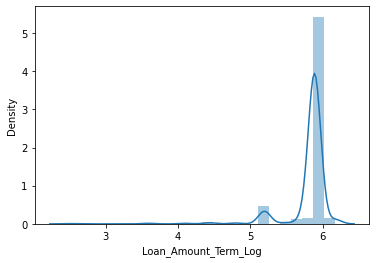

In [29]:
dt['Loan_Amount_Term_Log'] = np.log(dt['Loan_Amount_Term'])
sns.distplot(dt["Loan_Amount_Term_Log"])

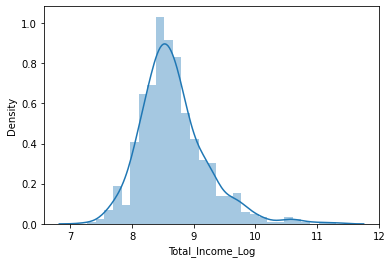

In [30]:
dt['Total_Income_Log'] = np.log(dt['Total_Income'])
sns.distplot(dt["Total_Income_Log"])

## Coorelation Matrix

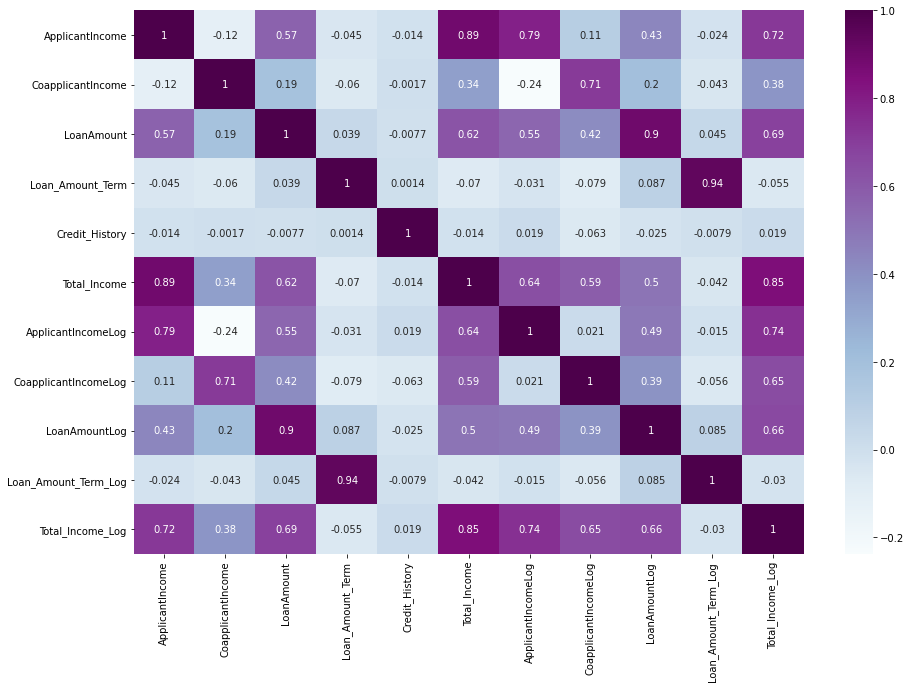

In [31]:
corr = dt.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot = True, cmap="BuPu")

# dark: highly correlated

In [32]:
dt.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,ApplicantIncomeLog,CoapplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,5849.0,8.674026,-inf,4.986426,5.886104,8.674026
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0,8.430109,7.318540,4.852030,5.886104,8.714568
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0,8.006368,-inf,4.189655,5.886104,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0,7.856707,7.765569,4.787492,5.886104,8.505323
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0,8.699515,-inf,4.948760,5.886104,8.699515


In [33]:
# need to remove irrelavant columns with values like "-inf"; only using columns that have log transformation applied to them
cols = ['ApplicantIncome', 'CoapplicantIncome', "LoanAmount", "Loan_Amount_Term", "Total_Income", 'Loan_ID', 'CoapplicantIncomeLog']
dt = dt.drop(columns=cols, axis=1)
dt.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log
0,Male,No,0,Graduate,No,1.0,Urban,Y,8.674026,4.986426,5.886104,8.674026
1,Male,Yes,1,Graduate,No,1.0,Rural,N,8.430109,4.852030,5.886104,8.714568
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y,8.006368,4.189655,5.886104,8.006368
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y,7.856707,4.787492,5.886104,8.505323
4,Male,No,0,Graduate,No,1.0,Urban,Y,8.699515,4.948760,5.886104,8.699515


## Label Encoding

In [34]:
from sklearn.preprocessing import LabelEncoder
cols = ['Gender',"Married","Education",'Self_Employed',"Property_Area","Loan_Status","Dependents"]
le = LabelEncoder()
for col in cols:
    dt[col] = le.fit_transform(dt[col]) # change categorical columns to numerical columns

In [35]:
dt.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log
0,1,0,0,0,0,1.0,2,1,8.674026,4.986426,5.886104,8.674026
1,1,1,1,0,0,1.0,0,0,8.430109,4.852030,5.886104,8.714568
2,1,1,0,0,1,1.0,2,1,8.006368,4.189655,5.886104,8.006368
3,1,1,0,1,0,1.0,2,1,7.856707,4.787492,5.886104,8.505323
4,1,0,0,0,0,1.0,2,1,8.699515,4.948760,5.886104,8.699515


## Train-Test Split

In [36]:
X = dt.drop(columns=['Loan_Status'], axis=1)
y = dt['Loan_Status']

In [37]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Model Training

In [38]:
from sklearn.model_selection import cross_val_score
def classify(model, x, y):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    model.fit(x_train, y_train)
    print("Accuracy is", model.score(x_test, y_test)*100)
    # test cross validation score with 5 scripts
    score = cross_val_score(model, x, y, cv=5)
    print("Cross validation is",np.mean(score)*100)

In [39]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
classify(model, X, y)

# model is generalising well

Accuracy is 78.37837837837837
Cross validation is 80.9462881514061


In [40]:
# testing with another classifier
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
classify(model, X, y)

Accuracy is 71.89189189189189
Cross validation is 71.015593762495


In [41]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier

In [42]:
model = RandomForestClassifier()
classify(model, X, y)

Accuracy is 77.83783783783784
Cross validation is 78.99373583899772


In [43]:
model = ExtraTreesClassifier()
classify(model, X, y)

Accuracy is 71.35135135135135
Cross validation is 77.04118352658936


In [44]:
pip install xgboost

In [45]:
from xgboost import XGBClassifier

In [46]:
model = XGBClassifier()
classify(model, X, y)

Accuracy is 77.83783783783784
Cross validation is 79.15767026522724


In [47]:
from lightgbm import LGBMClassifier

In [48]:
lgb = LGBMClassifier()
classify(lgb, X, y)

Accuracy is 76.75675675675676
Cross validation is 77.36372117819539


In [49]:
!pip install catboost

     |████████████████████████████████| 69.2MB 40kB/s 


In [50]:
from catboost import CatBoostClassifier

In [51]:
cb = CatBoostClassifier()
classify(cb, X, y)

Streaming output truncated to the last 5000 lines.
5:	learn: 0.6703224	total: 9.34ms	remaining: 1.55s
6:	learn: 0.6666277	total: 11ms	remaining: 1.56s
7:	learn: 0.6629097	total: 12.7ms	remaining: 1.58s
8:	learn: 0.6594296	total: 14.4ms	remaining: 1.58s
9:	learn: 0.6563546	total: 15.3ms	remaining: 1.51s
10:	learn: 0.6529348	total: 16.8ms	remaining: 1.51s
11:	learn: 0.6494909	total: 18.5ms	remaining: 1.52s
12:	learn: 0.6459339	total: 20.6ms	remaining: 1.56s
13:	learn: 0.6426182	total: 22.3ms	remaining: 1.57s
14:	learn: 0.6396150	total: 23.7ms	remaining: 1.56s
15:	learn: 0.6364717	total: 25.5ms	remaining: 1.56s
16:	learn: 0.6334566	total: 27.1ms	remaining: 1.57s
17:	learn: 0.6307360	total: 28.1ms	remaining: 1.53s
18:	learn: 0.6275721	total: 29.7ms	remaining: 1.53s
19:	learn: 0.6246655	total: 30.7ms	remaining: 1.5s
20:	learn: 0.6214380	total: 32.3ms	remaining: 1.51s
21:	learn: 0.6188802	total: 33.3ms	remaining: 1.48s
22:	learn: 0.6160496	total: 34.8ms	remaining: 1.48s
23:	learn: 0.6131190	

## Hyperparameter tuning

to possibly achieved better accuracy

In [52]:
from sklearn.model_selection import RandomizedSearchCV

In [53]:
 #Randomized Search CV
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

In [54]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [55]:
rf = RandomForestClassifier()

In [56]:
# Use the random grid to search for best hyperparameters
rf=RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='accuracy', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [57]:
rf.fit(X,y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.7s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.7s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.6s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.5s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.5s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.5s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   2.0s
[CV] n_estimators=1100, min_samples_split=10, mi

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.0min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [58]:
rf.best_score_

# accuracy has improved a lot

0.809462881514061

In [59]:
rf.best_params_

{'max_depth': 20,
 'max_features': 'auto',
 'min_samples_leaf': 10,
 'min_samples_split': 5,
 'n_estimators': 700}

In [60]:
# now for decision tree classifier
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

In [61]:
random_grid = {
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [62]:
dt = DecisionTreeClassifier()

In [63]:
dt=RandomizedSearchCV(estimator = dt, param_distributions = random_grid,scoring='accuracy', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [64]:
dt.fit(X,y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=5 
[CV]  min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=5, total=   0.0s
[CV] min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=5 
[CV]  min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=5, total=   0.0s
[CV] min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=5 
[CV]  min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=5, total=   0.0s
[CV] min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=5 
[CV]  min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=5, total=   0.0s
[CV] min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=5 
[CV]  min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=5, total=   0.0s
[CV] min_samples_split=5, min_samples_leaf=2, max_features=auto,

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  min_samples_split=15, min_samples_leaf=5, max_features=sqrt, max_depth=30, total=   0.0s
[CV] min_samples_split=15, min_samples_leaf=5, max_features=sqrt, max_depth=30 
[CV]  min_samples_split=15, min_samples_leaf=5, max_features=sqrt, max_depth=30, total=   0.0s
[CV] min_samples_split=15, min_samples_leaf=5, max_features=sqrt, max_depth=30 
[CV]  min_samples_split=15, min_samples_leaf=5, max_features=sqrt, max_depth=30, total=   0.0s
[CV] min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=15 
[CV]  min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=15, total=   0.0s
[CV] min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=15 
[CV]  min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=15, total=   0.0s
[CV] min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=15 
[CV]  min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=15, total=   0.0s
[CV] min_samples_split=5, min_sample

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.3s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort='deprecated',
                                                    random_state=None,
          

In [65]:
dt.best_score_

# accuracy has also improved

0.7768359322937491

In [66]:
dt.best_params_

{'max_depth': 5,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 5}

In [67]:
 #Randomized Search CV
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

In [68]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [69]:
ex = ExtraTreesClassifier()

In [70]:
ex=RandomizedSearchCV(estimator = ex, param_distributions = random_grid,scoring='accuracy', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [71]:
ex.fit(X,y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.1s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.1s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.1s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.1s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.1s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   1.4s
[CV] n_estimators=1100, min_samples_split=10, mi

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   43.7s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=ExtraTreesClassifier(bootstrap=False,
                                                  ccp_alpha=0.0,
                                                  class_weight=None,
                                                  criterion='gini',
                                                  max_depth=None,
                                                  max_features='auto',
                                                  max_leaf_nodes=None,
                                                  max_samples=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                        

In [72]:
ex.best_score_

0.809462881514061

In [73]:
ex.best_params_

{'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_leaf': 5,
 'min_samples_split': 5,
 'n_estimators': 900}

In [74]:
from scipy.stats import uniform, randint

In [75]:
xgb=XGBClassifier()

In [76]:
params = {
    "gamma": uniform(0, 0.5),
    "learning_rate": uniform(0.03, 0.3), # default 0.1 
    "max_depth": randint(2, 6), # default 3
    "n_estimators": randint(100, 150), # default 100
    "subsample": uniform(0.6, 0.4)
}

In [77]:
xgb = RandomizedSearchCV(estimator = xgb, param_distributions = params,scoring='accuracy', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [78]:
xgb.fit(X,y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] gamma=0.18727005942368125, learning_rate=0.3152142919229748, max_depth=4, n_estimators=107, subsample=0.8394633936788146 
[CV]  gamma=0.18727005942368125, learning_rate=0.3152142919229748, max_depth=4, n_estimators=107, subsample=0.8394633936788146, total=   0.1s
[CV] gamma=0.18727005942368125, learning_rate=0.3152142919229748, max_depth=4, n_estimators=107, subsample=0.8394633936788146 
[CV]  gamma=0.18727005942368125, learning_rate=0.3152142919229748, max_depth=4, n_estimators=107, subsample=0.8394633936788146, total=   0.1s
[CV] gamma=0.18727005942368125, learning_rate=0.3152142919229748, max_depth=4, n_estimators=107, subsample=0.8394633936788146 
[CV]  gamma=0.18727005942368125, learning_rate=0.3152142919229748, max_depth=4, n_estimators=107, subsample=0.8394633936788146, total=   0.1s
[CV] gamma=0.18727005942368125, learning_rate=0.3152142919229748, max_depth=4, n_estimators=107, subsample=0.8394633936788146 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  gamma=0.18727005942368125, learning_rate=0.3152142919229748, max_depth=4, n_estimators=107, subsample=0.8394633936788146, total=   0.1s
[CV] gamma=0.18727005942368125, learning_rate=0.3152142919229748, max_depth=4, n_estimators=107, subsample=0.8394633936788146 
[CV]  gamma=0.18727005942368125, learning_rate=0.3152142919229748, max_depth=4, n_estimators=107, subsample=0.8394633936788146, total=   0.1s
[CV] gamma=0.07800932022121826, learning_rate=0.07679835610086079, max_depth=4, n_estimators=110, subsample=0.9464704583099741 
[CV]  gamma=0.07800932022121826, learning_rate=0.07679835610086079, max_depth=4, n_estimators=110, subsample=0.9464704583099741, total=   0.1s
[CV] gamma=0.07800932022121826, learning_rate=0.07679835610086079, max_depth=4, n_estimators=110, subsample=0.9464704583099741 
[CV]  gamma=0.07800932022121826, learning_rate=0.07679835610086079, max_depth=4, n_estimators=110, subsample=0.9464704583099741, total=   0.1s
[CV] gamma=0.07800932022121826, learning_rate=0

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    2.9s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1, sc...
                                        'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f44a5675650>,
                                        'max_dep

In [79]:
xgb.best_score_

0.801332800213248

In [80]:
xgb.best_params_

{'gamma': 0.30582658024414044,
 'learning_rate': 0.03211989156591522,
 'max_depth': 2,
 'n_estimators': 148,
 'subsample': 0.8099098641033556}

In [81]:
grid = {'learning_rate': [0.03, 0.1],
        'depth': [4, 6, 10],
        'l2_leaf_reg': [1, 3, 5, 7, 9]}

In [82]:
cb = RandomizedSearchCV(estimator = cb, param_distributions = grid,scoring='accuracy', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [83]:
cb.fit(X,y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] learning_rate=0.1, l2_leaf_reg=7, depth=10 ......................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0:	learn: 0.6476884	total: 5.68ms	remaining: 5.68s
1:	learn: 0.6092674	total: 33ms	remaining: 16.5s
2:	learn: 0.5804011	total: 35ms	remaining: 11.6s
3:	learn: 0.5570911	total: 35.8ms	remaining: 8.92s
4:	learn: 0.5379657	total: 36.6ms	remaining: 7.29s
5:	learn: 0.5167507	total: 49.9ms	remaining: 8.26s
6:	learn: 0.5040144	total: 51.6ms	remaining: 7.32s
7:	learn: 0.4866200	total: 69.7ms	remaining: 8.64s
8:	learn: 0.4702539	total: 82.4ms	remaining: 9.07s
9:	learn: 0.4568103	total: 88.7ms	remaining: 8.78s
10:	learn: 0.4430649	total: 100ms	remaining: 9.03s
11:	learn: 0.4338424	total: 106ms	remaining: 8.76s
12:	learn: 0.4218191	total: 117ms	remaining: 8.87s
13:	learn: 0.4079188	total: 128ms	remaining: 8.99s
14:	learn: 0.3986568	total: 138ms	remaining: 9.08s
15:	learn: 0.3892861	total: 149ms	remaining: 9.17s
16:	learn: 0.3805437	total: 160ms	remaining: 9.24s
17:	learn: 0.3755492	total: 161ms	remaining: 8.8s
18:	learn: 0.3717750	total: 163ms	remaining: 8.39s
19:	learn: 0.3671217	total: 171ms	re

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   12.2s remaining:    0.0s


Streaming output truncated to the last 5000 lines.
9:	learn: 0.5810438	total: 16.6ms	remaining: 1.64s
10:	learn: 0.5738637	total: 17.2ms	remaining: 1.54s
11:	learn: 0.5657963	total: 17.9ms	remaining: 1.48s
12:	learn: 0.5592343	total: 19ms	remaining: 1.44s
13:	learn: 0.5537022	total: 19.8ms	remaining: 1.39s
14:	learn: 0.5475673	total: 20.8ms	remaining: 1.36s
15:	learn: 0.5414086	total: 21.9ms	remaining: 1.34s
16:	learn: 0.5376042	total: 23ms	remaining: 1.33s
17:	learn: 0.5328662	total: 24.1ms	remaining: 1.31s
18:	learn: 0.5288977	total: 25.1ms	remaining: 1.3s
19:	learn: 0.5245159	total: 26.4ms	remaining: 1.29s
20:	learn: 0.5195405	total: 27.5ms	remaining: 1.28s
21:	learn: 0.5147149	total: 28.5ms	remaining: 1.27s
22:	learn: 0.5109438	total: 29.6ms	remaining: 1.26s
23:	learn: 0.5071789	total: 30.7ms	remaining: 1.25s
24:	learn: 0.5032932	total: 31.8ms	remaining: 1.24s
25:	learn: 0.5001787	total: 32.8ms	remaining: 1.23s
26:	learn: 0.4970259	total: 33.9ms	remaining: 1.22s
27:	learn: 0.493973

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  5.0min finished


0:	learn: 0.6465524	total: 2.39ms	remaining: 2.39s
1:	learn: 0.6100092	total: 4.46ms	remaining: 2.22s
2:	learn: 0.5809132	total: 6.67ms	remaining: 2.22s
3:	learn: 0.5527155	total: 8.77ms	remaining: 2.18s
4:	learn: 0.5329471	total: 10.3ms	remaining: 2.06s
5:	learn: 0.5157737	total: 11.8ms	remaining: 1.95s
6:	learn: 0.5005112	total: 13.3ms	remaining: 1.88s
7:	learn: 0.4885601	total: 14.7ms	remaining: 1.82s
8:	learn: 0.4789128	total: 18.3ms	remaining: 2.01s
9:	learn: 0.4678479	total: 20.1ms	remaining: 1.99s
10:	learn: 0.4576131	total: 21.6ms	remaining: 1.94s
11:	learn: 0.4487770	total: 23ms	remaining: 1.9s
12:	learn: 0.4448357	total: 24.4ms	remaining: 1.85s
13:	learn: 0.4413459	total: 25.5ms	remaining: 1.79s
14:	learn: 0.4368824	total: 26.9ms	remaining: 1.77s
15:	learn: 0.4326843	total: 28.4ms	remaining: 1.74s
16:	learn: 0.4262987	total: 29.8ms	remaining: 1.72s
17:	learn: 0.4221478	total: 31.2ms	remaining: 1.7s
18:	learn: 0.4188924	total: 32.8ms	remaining: 1.69s
19:	learn: 0.4154805	total

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=<catboost.core.CatBoostClassifier object at 0x7f448acd0c90>,
                   iid='deprecated', n_iter=10, n_jobs=1,
                   param_distributions={'depth': [4, 6, 10],
                                        'l2_leaf_reg': [1, 3, 5, 7, 9],
                                        'learning_rate': [0.03, 0.1]},
                   pre_dispatch='2*n_jobs', random_state=42, refit=True,
                   return_train_score=False, scoring='accuracy', verbose=2)

In [84]:
cb.best_score_

0.7882846861255497

In [85]:
cb.best_params_

{'depth': 6, 'l2_leaf_reg': 7, 'learning_rate': 0.1}

## Confusion Matrix

In [86]:
from sklearn.metrics import confusion_matrix

In [87]:
y_pred = dt.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 34,  31],
       [  3, 117]])

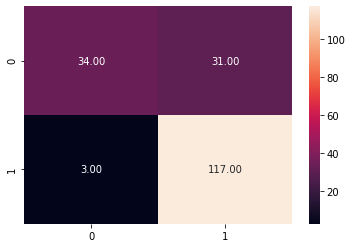

In [88]:
sns.heatmap(cm, annot=True,fmt='.2f')

In [89]:
y_pred = rf.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 27,  38],
       [  2, 118]])

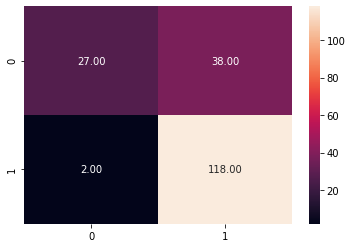

In [90]:
sns.heatmap(cm, annot=True,fmt='.2f')

In [91]:
y_pred = ex.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 27,  38],
       [  2, 118]])

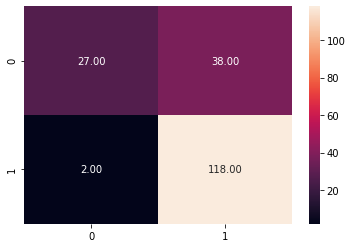

In [92]:
sns.heatmap(cm, annot=True,fmt='.2f')

In [93]:
y_pred = xgb.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 29,  36],
       [  2, 118]])

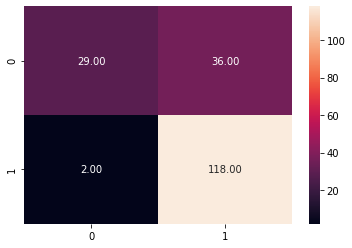

In [94]:
sns.heatmap(cm, annot=True,fmt='.2f')